# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | st. john's
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | happy valley-goose bay
Processing Record 4 of Set 1 | kapa'a
Processing Record 5 of Set 1 | al ghayzah
Processing Record 6 of Set 1 | shimoda
Processing Record 7 of Set 1 | alo
Processing Record 8 of Set 1 | kimovsk
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | kharan
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | crane
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | camaqua
Processing Record 17 of Set 1 | hanceville
Processing Record 18 of Set 1 | papatowai
Processing Record 19 of Set 1 | trashi yangtse
Processing Record 20 of Set 1 | avarua
Processing Record 21 of Set 1 | lata
Processing Record 22 of Set 1 | constantia
Processing Record 23 of Set 1 | 

Processing Record 42 of Set 4 | hadibu
Processing Record 43 of Set 4 | nazyvayevsk
Processing Record 44 of Set 4 | tyre
Processing Record 45 of Set 4 | macenta
Processing Record 46 of Set 4 | kuraymah
Processing Record 47 of Set 4 | dudinka
Processing Record 48 of Set 4 | brokopondo
Processing Record 49 of Set 4 | nizhneangarsk
Processing Record 0 of Set 5 | tchintabaraden
Processing Record 1 of Set 5 | bayanaul
Processing Record 2 of Set 5 | coron
Processing Record 3 of Set 5 | hammerfest
Processing Record 4 of Set 5 | labuan
Processing Record 5 of Set 5 | daru
Processing Record 6 of Set 5 | netanya
Processing Record 7 of Set 5 | anadyr
Processing Record 8 of Set 5 | kampala
Processing Record 9 of Set 5 | korla
Processing Record 10 of Set 5 | kuta
Processing Record 11 of Set 5 | wailua homesteads
Processing Record 12 of Set 5 | gaoual
Processing Record 13 of Set 5 | arona
Processing Record 14 of Set 5 | vila velha
Processing Record 15 of Set 5 | isle of lewis
City not found. Skipping.

Processing Record 33 of Set 8 | itacare
Processing Record 34 of Set 8 | goz beida
Processing Record 35 of Set 8 | copiapo
Processing Record 36 of Set 8 | international falls
Processing Record 37 of Set 8 | plastun
Processing Record 38 of Set 8 | cullowhee
Processing Record 39 of Set 8 | hiratacho
Processing Record 40 of Set 8 | taulaga
Processing Record 41 of Set 8 | bereeda
Processing Record 42 of Set 8 | caldas novas
Processing Record 43 of Set 8 | kalmunai
Processing Record 44 of Set 8 | mauganj
Processing Record 45 of Set 8 | santo antonio do leverger
Processing Record 46 of Set 8 | hayma'
City not found. Skipping...
Processing Record 47 of Set 8 | gamba
Processing Record 48 of Set 8 | bamboo flat
Processing Record 49 of Set 8 | vilyuchinsk
Processing Record 0 of Set 9 | bunbury
Processing Record 1 of Set 9 | san jose del cabo
Processing Record 2 of Set 9 | al jubayl
Processing Record 3 of Set 9 | woods creek
Processing Record 4 of Set 9 | wanparti
Processing Record 5 of Set 9 | na

Processing Record 21 of Set 12 | port augusta
Processing Record 22 of Set 12 | chui
Processing Record 23 of Set 12 | arba minch
Processing Record 24 of Set 12 | chonchi
Processing Record 25 of Set 12 | baruun-urt
Processing Record 26 of Set 12 | boguchany
Processing Record 27 of Set 12 | pavlodar
Processing Record 28 of Set 12 | santyoku
Processing Record 29 of Set 12 | susuman
Processing Record 30 of Set 12 | labytnangi
Processing Record 31 of Set 12 | watampone
Processing Record 32 of Set 12 | zhangye
Processing Record 33 of Set 12 | santana
Processing Record 34 of Set 12 | gorontalo
Processing Record 35 of Set 12 | claudio
Processing Record 36 of Set 12 | gizo
Processing Record 37 of Set 12 | veinticinco de mayo
Processing Record 38 of Set 12 | paxtakor shahri
City not found. Skipping...
Processing Record 39 of Set 12 | tucuma
Processing Record 40 of Set 12 | broken hill
Processing Record 41 of Set 12 | nurota
Processing Record 42 of Set 12 | buala
Processing Record 43 of Set 12 | k

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,st. john's,47.5649,-52.7093,1.75,82,100,2.06,CA,1701040947
1,grytviken,-54.2811,-36.5092,3.97,95,100,3.90,GS,1701040947
2,happy valley-goose bay,53.3168,-60.3315,-1.83,69,75,6.69,CA,1701040947
3,kapa'a,22.0752,-159.3190,26.99,79,75,7.72,US,1701040947
4,al ghayzah,16.2079,52.1760,25.65,70,10,1.36,YE,1701040947


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.5649,-52.7093,1.75,82,100,2.06,CA,1701040947
1,grytviken,-54.2811,-36.5092,3.97,95,100,3.90,GS,1701040947
2,happy valley-goose bay,53.3168,-60.3315,-1.83,69,75,6.69,CA,1701040947
3,kapa'a,22.0752,-159.3190,26.99,79,75,7.72,US,1701040947
4,al ghayzah,16.2079,52.1760,25.65,70,10,1.36,YE,1701040947


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

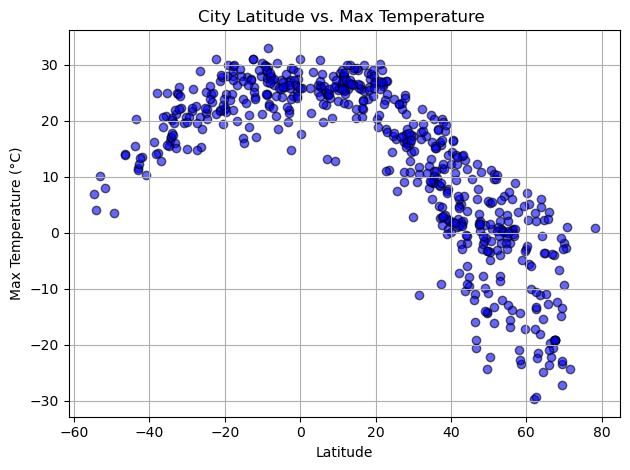

In [8]:
# Build scatter plot for latitude vs. temperature
# Get data for the scatter plot
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']
# Create the scatter plot
plt.figure()
plt.scatter(latitude, temperature, color='blue', edgecolors='black', alpha=0.6)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature ')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.tight_layout()
plt.show()

#### Latitude Vs. Humidity

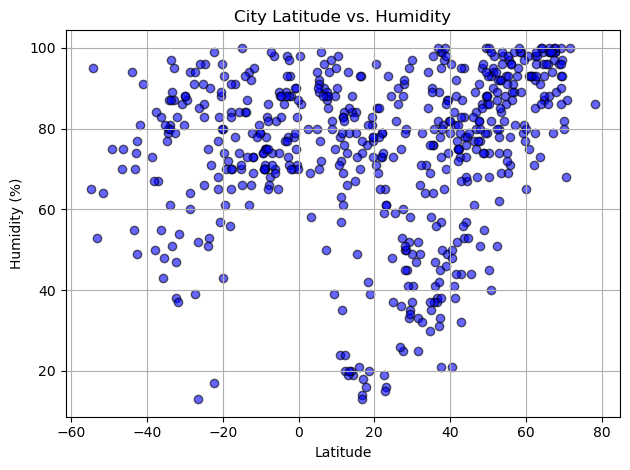

In [9]:
# Build the scatter plots for latitude vs. humidity
# Get data for the scatter plot
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']
# Create the scatter plot
plt.figure()
plt.scatter(latitude, humidity, color='blue', edgecolors='black', alpha=0.6)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.tight_layout()
plt.show()

#### Latitude Vs. Cloudiness

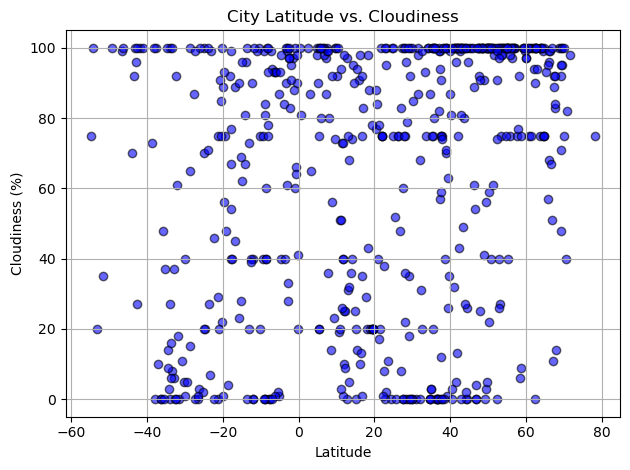

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# Get data for the scatter plot
latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']
# Create the scatter plot
plt.figure()
plt.scatter(latitude, cloudiness, color='blue', edgecolors='black', alpha=0.6)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.tight_layout()
plt.show()

#### Latitude vs. Wind Speed Plot

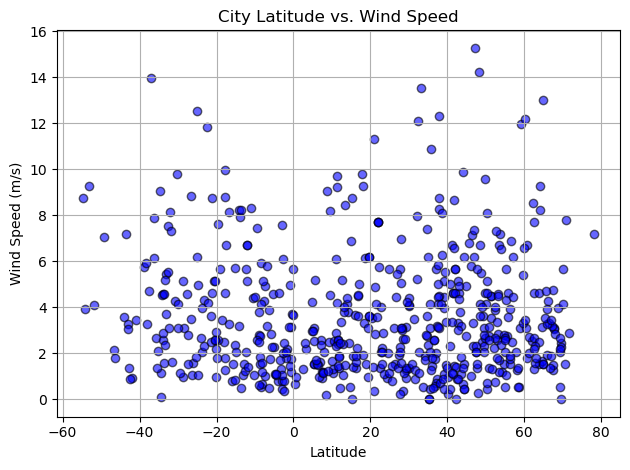

In [11]:
# Build the scatter plots for latitude vs. wind speed
# Get data for the scatter plot
latitude = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']

# Create a scatter plot
plt.figure()
plt.scatter(latitude, wind_speed, color='blue', edgecolors='black', alpha=0.6)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.tight_layout()
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is: -0.7157935172029241


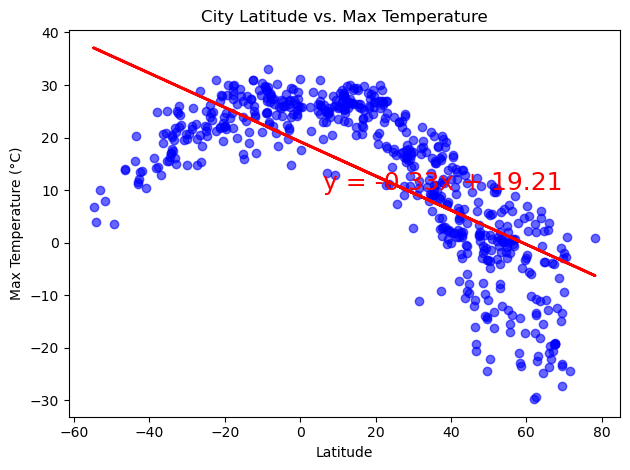

In [12]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_data, y_data, x_label, y_label, title):
    # Create a scatter plot
    plt.figure()
    plt.scatter(x_data, y_data, color='blue', alpha=0.6)

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
    regression_line = slope * x_data + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot the regression line
    plt.plot(x_data, regression_line, color='red', linewidth=2)
    plt.annotate(line_eq,(6,10),fontsize=18,color="red")
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Show plot
    print(f"The r-value is: {r_value}")
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming 'latitude' and 'temperature' are your data columns
linear_regression_plot(latitude, temperature, 'Latitude', 'Max Temperature (°C)', 'City Latitude vs. Max Temperature')

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,st. john's,47.5649,-52.7093,1.75,82,100,2.06,CA,1701040947
2,happy valley-goose bay,53.3168,-60.3315,-1.83,69,75,6.69,CA,1701040947
3,kapa'a,22.0752,-159.3190,26.99,79,75,7.72,US,1701040947
4,al ghayzah,16.2079,52.1760,25.65,70,10,1.36,YE,1701040947
5,shimoda,34.6667,138.9500,13.20,69,0,2.74,JP,1701040947


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,3.97,95,100,3.90,GS,1701040947
14,port-aux-francais,-49.3500,70.2167,3.51,75,100,7.04,TF,1701040948
15,camaqua,-30.8511,-51.8122,19.61,86,11,4.25,BR,1701040948
17,papatowai,-46.5619,169.4708,14.07,70,99,2.14,NZ,1701040949
19,avarua,-21.2078,-159.7750,27.03,65,75,8.75,CK,1701040949


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8592593264189228


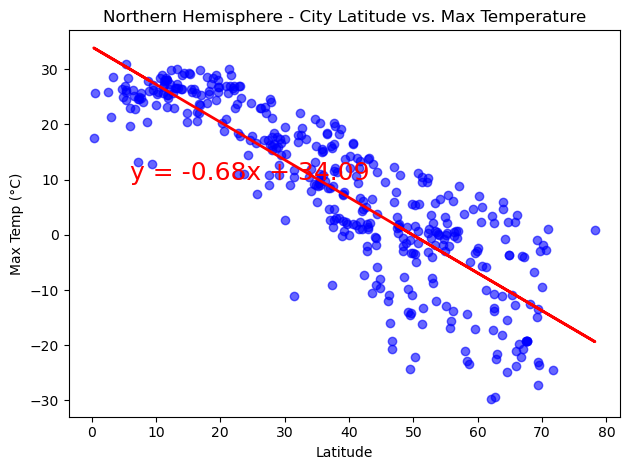

In [15]:
# Linear regression on Northern Hemisphere
lat_north_hemi = northern_hemi_df['Lat']
temp_north_hemi = northern_hemi_df['Max Temp']
linear_regression_plot(lat_north_hemi, temp_north_hemi, 'Latitude', 'Max Temp (°C)', 'Northern Hemisphere - City Latitude vs. Max Temperature')

The r-value is: 0.714946281284133


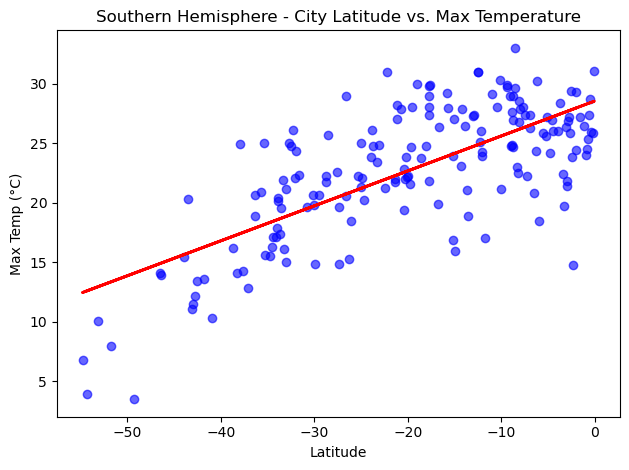

In [16]:
# Linear regression on Southern Hemisphere
lat_south_hemi = southern_hemi_df['Lat']
temp_south_hemi = southern_hemi_df['Max Temp']
linear_regression_plot(lat_south_hemi, temp_south_hemi, 'Latitude', 'Max Temp (°C)', 'Southern Hemisphere - City Latitude vs. Max Temperature')

**Discussion about the linear relationship:** The further north of the equator you go the colder the maximum temperature can be where as the further south of the equator you go the warmer the max temperature can achieve up to a point. I imagine once you reach the south pole the max temparature drops drastically.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.34637353876581994


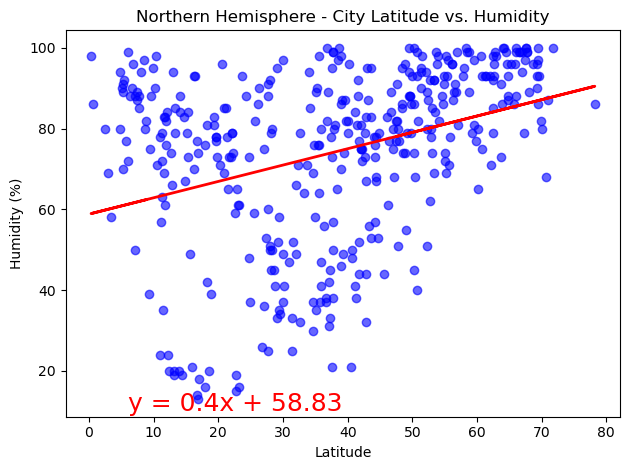

In [17]:
# Northern Hemisphere
lat_north_hemi = northern_hemi_df['Lat']
humidity_north_hemi = northern_hemi_df['Humidity']
linear_regression_plot(lat_north_hemi, humidity_north_hemi, 'Latitude', 'Humidity (%)', 'Northern Hemisphere - City Latitude vs. Humidity')

The r-value is: 0.21424300386343045


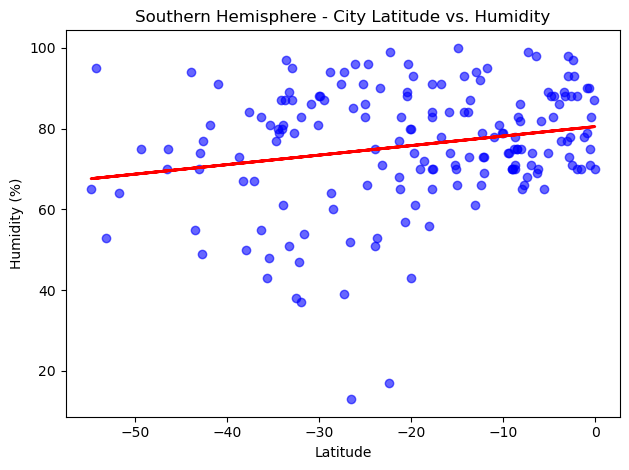

In [18]:
# Southern Hemisphere
lat_south_hemi = southern_hemi_df['Lat']
humidity_south_hemi = southern_hemi_df['Humidity']
linear_regression_plot(lat_south_hemi, humidity_south_hemi, 'Latitude', 'Humidity (%)', 'Southern Hemisphere - City Latitude vs. Humidity')

**Discussion about the linear relationship:** Humidity seems to become gradually higher in the northern hemisphere the further north you go and gradually lower the further south you go.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2525304849150793


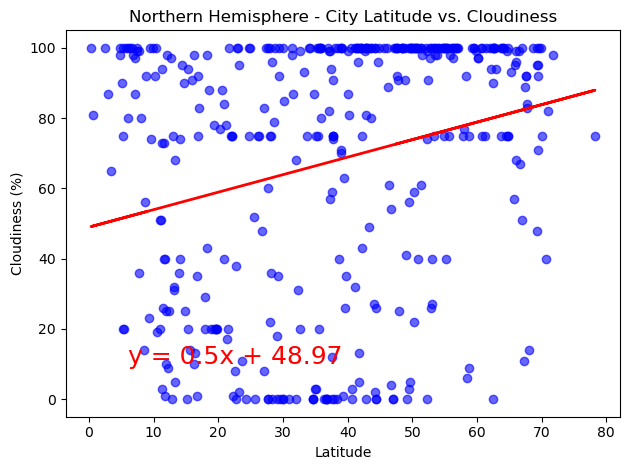

In [19]:
# Northern Hemisphere
lat_north_hemi = northern_hemi_df['Lat']
cloud_north_hemi = northern_hemi_df['Cloudiness']
linear_regression_plot(lat_north_hemi, cloud_north_hemi, 'Latitude', 'Cloudiness (%)', 'Northern Hemisphere - City Latitude vs. Cloudiness')

The r-value is: 0.14522773046718684


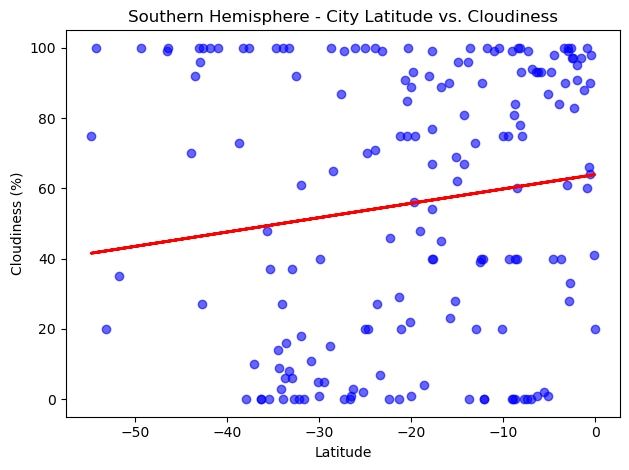

In [20]:
# Southern Hemisphere
lat_south_hemi = southern_hemi_df['Lat']
cloud_south_hemi = southern_hemi_df['Cloudiness']
linear_regression_plot(lat_south_hemi, cloud_south_hemi, 'Latitude', 'Cloudiness (%)', 'Southern Hemisphere - City Latitude vs. Cloudiness')

**Discussion about the linear relationship:** Cloudiness does not particularly get affected by the latitude and is likely dictated by the weather and seasons.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07973397880909158


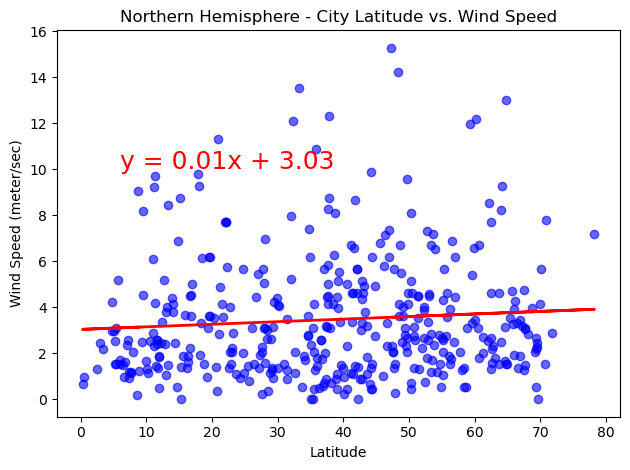

In [21]:
# Northern Hemisphere
lat_north_hemi = northern_hemi_df['Lat']
wind_north_hemi = northern_hemi_df['Wind Speed']
linear_regression_plot(lat_north_hemi, wind_north_hemi, 'Latitude', 'Wind Speed (meter/sec)', 'Northern Hemisphere - City Latitude vs. Wind Speed')

The r-value is: -0.24291314725915233


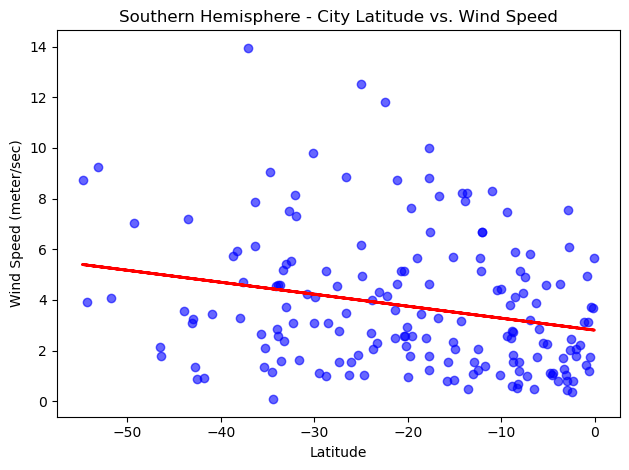

In [22]:
# Southern Hemisphere
lat_south_hemi = southern_hemi_df['Lat']
wind_south_hemi = southern_hemi_df['Wind Speed']
linear_regression_plot(lat_south_hemi, wind_south_hemi, 'Latitude', 'Wind Speed (meter/sec)', 'Southern Hemisphere - City Latitude vs. Wind Speed')

**Discussion about the linear relationship:** It seems as though wind speed is not affected by latitude very much and is fairly similar all over the globe.